# **Marketing Analysis for E-Commerce Company**

**Problem statement:**

A rapidly growing e-commerce company aims to transition from intuition-based marketing to a data-driven approach. By analyzing customer demographics, transaction data, marketing spend, and discount details from 2019, the company seeks to gain a comprehensive understanding of customer behavior. The objectives are to optimize marketing campaigns across various channels, leverage data insights to enhance customer retention, predict customer lifetime value, and ultimately drive sustainable revenue growth.

## Importing libraries and downloading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

# downloading datasets
!gdown --folder 1VXaZSDFqN_Zi3FxucRlthz97Etl1CYfJ

# e-commerce datasets
cust_df = pd.read_csv('/content/Block 2 project/Customers.csv')
disc_coupon_df = pd.read_csv('/content/Block 2 project/Discount_Coupon.csv')
mrkt_spend_df = pd.read_csv('/content/Block 2 project/Marketing_Spend.csv')
online_sales_df = pd.read_csv('/content/Block 2 project/Online_Sales.csv')
tax_amt_df = pd.read_csv('/content/Block 2 project/Tax_amount.csv')

Retrieving folder contents
Processing file 1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc Customers.csv
Processing file 1fI7Kg4iXh3GTxFlto4n0UQ-5nOzAM78- Dataset Description.docx
Processing file 144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB Discount_Coupon.csv
Processing file 1xgzPmbSCU8KM6Lt1rJXLFADHxgsy9u4t Marketing_Spend.csv
Processing file 1F8EPu3t_GbXX3BQ3OQSXsoieeSsCR5ly Online_Sales.csv
Processing file 1CmZ0j83nKoNeOqbGgZHSa92-kdXHkXIP Tax_amount.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1nKb67meAvoFNRG_VueNXh_-k_2F9Oisc
To: /content/Block 2 project/Customers.csv
100% 31.8k/31.8k [00:00<00:00, 39.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fI7Kg4iXh3GTxFlto4n0UQ-5nOzAM78-
To: /content/Block 2 project/Dataset Description.docx
100% 7.52k/7.52k [00:00<00:00, 5.34MB/s]
Downloading...
From: https://drive.google.com/uc?id=144wrGLTgzCm8FZdl0rasbjsm6dKG_yvB
To: /content/Block 2

## Basic Metrics

In [ ]:
online_sales_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
online_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
online_sales_df.duplicated().sum()

0

In [ ]:
online_sales_df['Product_Category'].nunique()

20

- 52934 Transactions happened in the year 2019.
- There are 20 unique Product categories.
- No null values or duplicates found in online sales data.

In [ ]:
cust_df.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
cust_df.duplicated().sum()

0

- 1468 Customers made purchase in this e-commerce company.
- No null values or duplicates found in the customers data.

In [ ]:
disc_coupon_df.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
disc_coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
disc_coupon_df.duplicated().sum()

0

In [ ]:
disc_coupon_df['Coupon_Code'].nunique()

48

In [ ]:
disc_coupon_df['Product_Category'].nunique()

17

- 48 copon codes were offered for 17 Product categories.
- No null values or duplicates found in the discount coupon data.

In [ ]:
mrkt_spend_df.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
mrkt_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


- No null values or duplicates found in marketing spend data

In [ ]:
mrkt_spend_df.duplicated().sum()

0

In [ ]:
tax_amt_df.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


In [ ]:
tax_amt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Category  20 non-null     object
 1   GST               20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [ ]:
tax_amt_df.duplicated().sum()

0

- No null values or dupicates found in the tax amount data.

## Descriptive Statistics

In [ ]:
sales_df = online_sales_df.copy()

sales_df['CustomerID'] = sales_df['CustomerID'].astype(str)
sales_df['Transaction_Date'] = pd.to_datetime(sales_df['Transaction_Date'])
sales_df['Transaction_Day'] = sales_df['Transaction_Date'].dt.day_name()
sales_df['Transaction_Month'] = sales_df['Transaction_Date'].dt.month_name()

cust_df['CustomerID'] = cust_df['CustomerID'].astype(str)
cust_df['Gender'] = cust_df['Gender'].replace({'F': 'Female', 'M': 'Male'})
sales_df = pd.merge(sales_df, cust_df, how='left', on='CustomerID')

month_mapping = { 'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December' }
disc_coupon_df['Month'] = disc_coupon_df['Month'].replace(month_mapping)

sales_df = pd.merge(sales_df, disc_coupon_df, how='left', left_on=['Product_Category', 'Transaction_Month'], right_on=['Product_Category', 'Month'])
sales_df.drop(columns=['Month'], inplace=True)
sales_df['Coupon_Code'] = sales_df['Coupon_Code'].fillna('No Coupon')
sales_df['Discount_pct'] = sales_df['Discount_pct'].fillna(0)

sales_df = pd.merge(sales_df, tax_amt_df, how='left', on='Product_Category')
sales_df['GST_pct'] = sales_df['GST'].str.rstrip('%').astype(float)

sales_df['Price'] = sales_df['Quantity'] * sales_df['Avg_Price']
sales_df['Discounted_price'] = sales_df['Price'] * (1-sales_df['Discount_pct']/100)
sales_df['Invoice_Value'] = (sales_df['Discounted_price'] * (1+ sales_df['GST_pct']/100)) + sales_df['Delivery_Charges']
sales_df.drop(columns=['Price', 'Discounted_price', 'GST'], inplace=True)

sales_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Transaction_Day,Transaction_Month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST_pct,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Tuesday,January,Male,Chicago,12,ELEC10,10.0,10.0,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Tuesday,January,Male,Chicago,12,ELEC10,10.0,10.0,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Tuesday,January,Male,Chicago,12,OFF10,10.0,10.0,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Tuesday,January,Male,Chicago,12,SALE10,10.0,18.0,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Tuesday,January,Male,Chicago,12,AIO10,10.0,18.0,24.0230


In [ ]:
sales_df.describe(include='object')

,CustomerID,Product_SKU,Product_Description,Product_Category,Coupon_Status,Transaction_Day,Transaction_Month,Gender,Location,Coupon_Code
count,52924,52924,52924,52924,52924,52924,52924,52924,52924,52924
unique,1468,1145,404,20,3,7,12,2,5,46
top,12748,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,Friday,August,Female,Chicago,SALE20
freq,695,3511,3511,18126,26926,9266,6150,33007,18380,6373


In [ ]:
sales_df[['Quantity','Discount_pct','Delivery_Charges','Invoice_Value']].describe()

,Quantity,Discount_pct,Delivery_Charges,Invoice_Value
count,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,19.802358,10.517630,89.080787
std,20.104711,8.278878,19.475613,152.506512
min,1.000000,0.000000,0.000000,4.375440
25%,1.000000,10.000000,6.000000,18.545760
50%,1.000000,20.000000,6.000000,40.683740
75%,2.000000,30.000000,6.500000,123.447600
max,900.000000,30.000000,521.360000,8979.275000


- Customer having CustomerID 12748 made more transactions.
- Product having SKU GGOENEBJ079499 were sold most.
- Products from category Apparel were sold most.
- Most of the customers clicked the coupon.
- Majority of the sales were done in August month and on Fridays.
- Coupon Code SALE20 is used by most of the customers.
- On an average, a customer purchases 4 products.
- Average delivery chares is USD 10.
- Average discount rate is 20%.
- Invoice value ranges from USD 4 to USD 8980 with average being USD 90.


In [ ]:
cust_df.describe(include='object')

,CustomerID,Gender,Location
count,1468,1468,1468
unique,1468,2,5
top,17850,Female,California
freq,1,934,464


In [ ]:
cust_df['Tenure_Months'].describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Tenure_Months, dtype: float64

- Most of the Customers are Females i.e., 934 out of 1468.
- Most of the Customers are from California.
- Average Tenure of the Customers is 25 months.

In [ ]:
mrkt_spend_df.describe()

,Offline_Spend,Online_Spend
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


- Average Offline marketing spend is USD 2850.
- Average Online marketing spend is USD 1905.

## Univarient Analysis

### Gender and Location

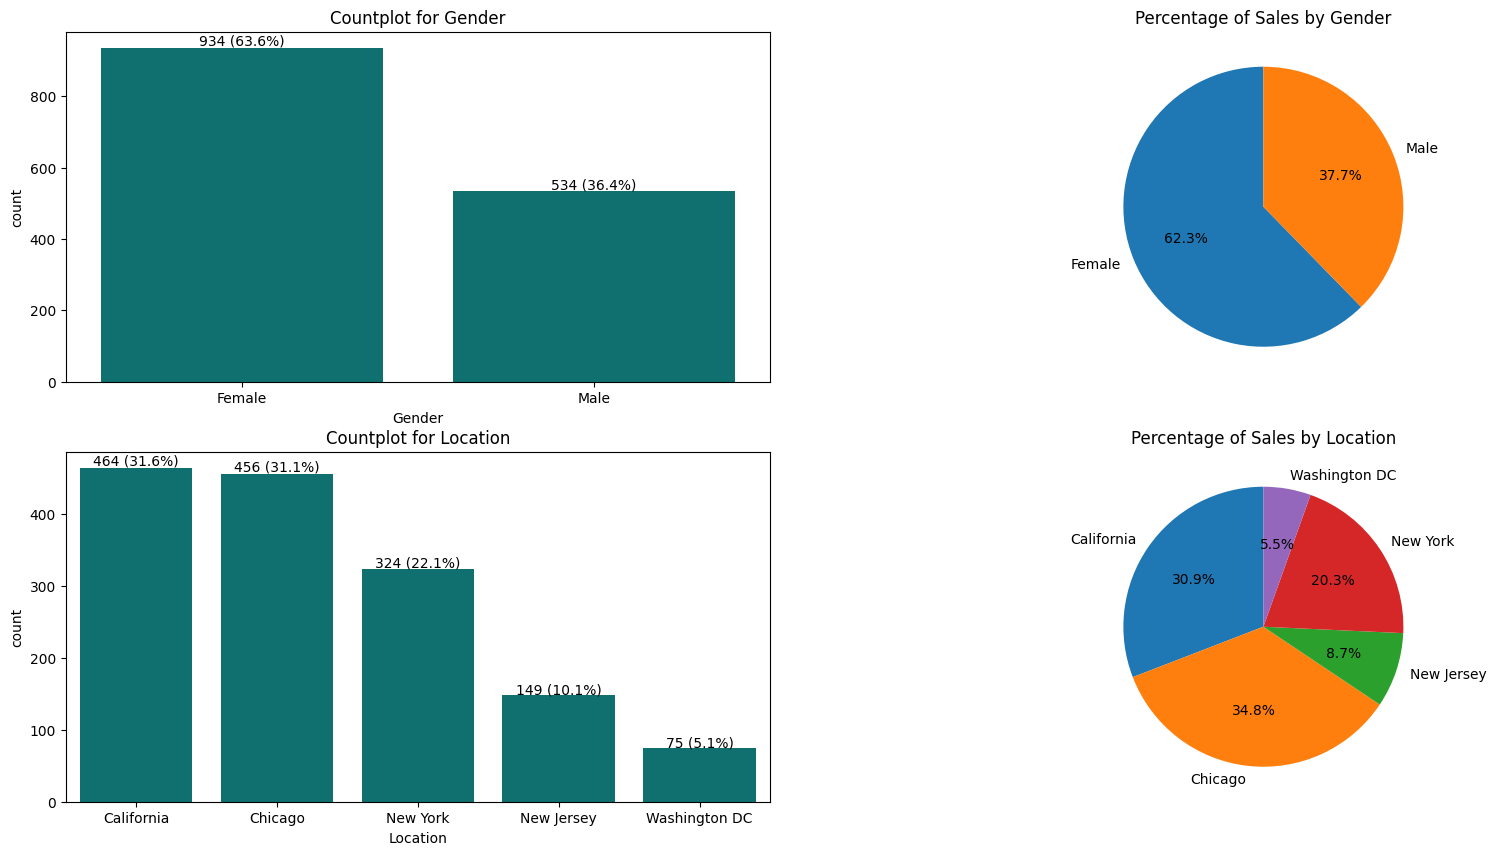

In [ ]:
plt.figure(figsize=(20, 10))
cols = ['Gender', 'Location']
for i in cols:
  plt.subplot(2, 2, cols.index(i)*2+1)
  plt.title('Countplot for '+i)
  g = sns.countplot(x=i, data=cust_df, order=cust_df[i].value_counts().index, color = 'teal')
  for p in g.patches:
      g.annotate('{0:.0f} ({1:.1f}%)'.format(p.get_height(), (p.get_height()/1468)*100), (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')

  plt.subplot(2, 2, cols.index(i)*2+2)
  plt.title('Percentage of Sales by '+i)
  bill = sales_df.groupby(i)['Invoice_Value'].sum()
  plt.pie(bill, labels=bill.index, autopct='%1.1f%%', startangle=90)

plt.show()

In [ ]:
sales_df.groupby('Gender')['Invoice_Value'].sum().reset_index()

,Gender,Invoice_Value
0,Female,2.937366e+06
1,Male,1.777146e+06


In [ ]:
sales_df.groupby('Location')['Invoice_Value'].sum().reset_index()

,Location,Invoice_Value
0,California,1.455051e+06
1,Chicago,1.638484e+06
2,New Jersey,4.079342e+05
3,New York,9.551380e+05
4,Washington DC,2.579037e+05


- Around 64% of the Customers are females and rest 36% are males i.e., 934 are females and 534 are males.
- Females contibutes 62% of the total sales i.e., around 3 Million USD whereas Males contributes only 38% i.e., around 1.8 Million USD.
- Around 63% of the customers are from California and Chicago, 22% of the customers are from New York and rest 15% are from New Jercy and Washington DC.
- Chicago contributes around 35% of the total sales which stands at top i.e., around 1.6 Million USD followed by California which contributes 31% i.e., around 1.4 Million USD.
- New York contributes 20% of sales i.e, around 955K USD.
- Washington DC contributes around 9% i.e., 258K USD.
- New Jersey contributes only 5.5% of sales which stands at the last i.e., around 400K USD.



### Transaction Month and Day

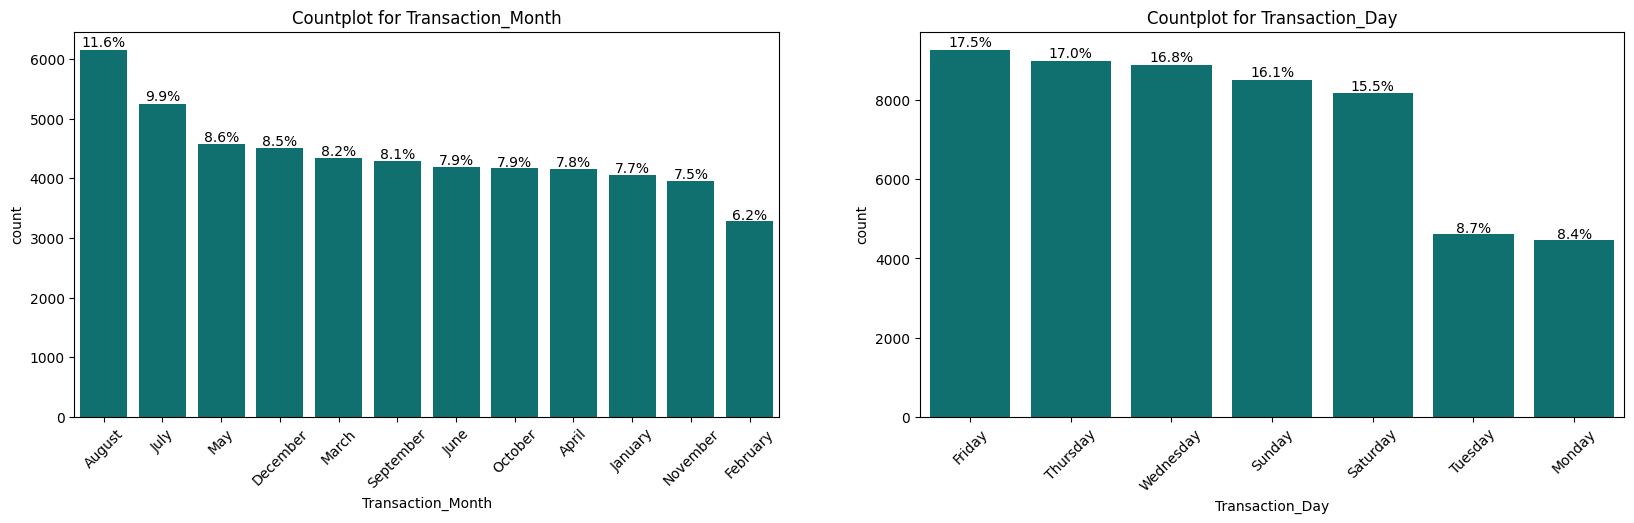

In [ ]:
plt.figure(figsize=(20, 5))
cols = ['Transaction_Month', 'Transaction_Day']
for i in cols:
  plt.subplot(1, 2, cols.index(i)+1)
  plt.title('Countplot for '+i)
  plt.xticks(rotation=45)
  g = sns.countplot(x=i, data=sales_df, order=sales_df[i].value_counts().index, color = 'teal')
  for p in g.patches:
    g.annotate(format((p.get_height()/len(sales_df))*100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')
plt.show()

- August month stands top on number of purchases i.e., 11% followed by July with 10% and rest of the months got average purchases of 7.5% - 8.5% except frebruary which got less number of purchases i.e., 6%.
- Most of the purchases happened on Fridays and Thursdays.
- Wednesday, Saturday and Sundays got above average sales whereas Tuesdays and Mondays got below average sales

### Product Category

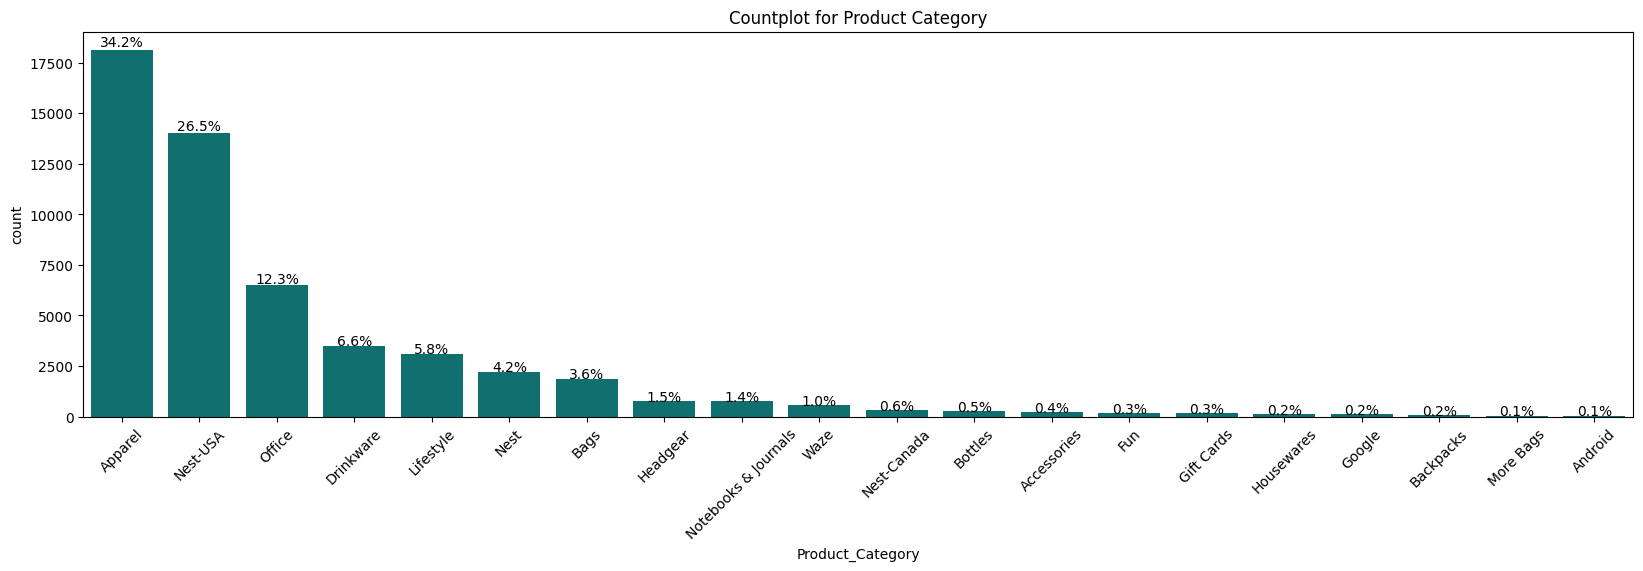

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Countplot for Product Category')
plt.xticks(rotation=45)
g = sns.countplot(x='Product_Category', data=sales_df, order=sales_df['Product_Category'].value_counts().index, color = 'teal')
for p in g.patches:
  g.annotate(format((p.get_height()/len(sales_df))*100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')
plt.show()

- Apparel Product Category stand top on most number of sales i.e., around 34.2% followed by Nest-USA with 26.5% of sales and Office with 12.3% of sales.
- Drinkware, Lifestyle, Nest and Bags all together contributes to 20% of sales whereas rest of the Categories contributes 7%.

#### Top 5 Product Categories in each Month

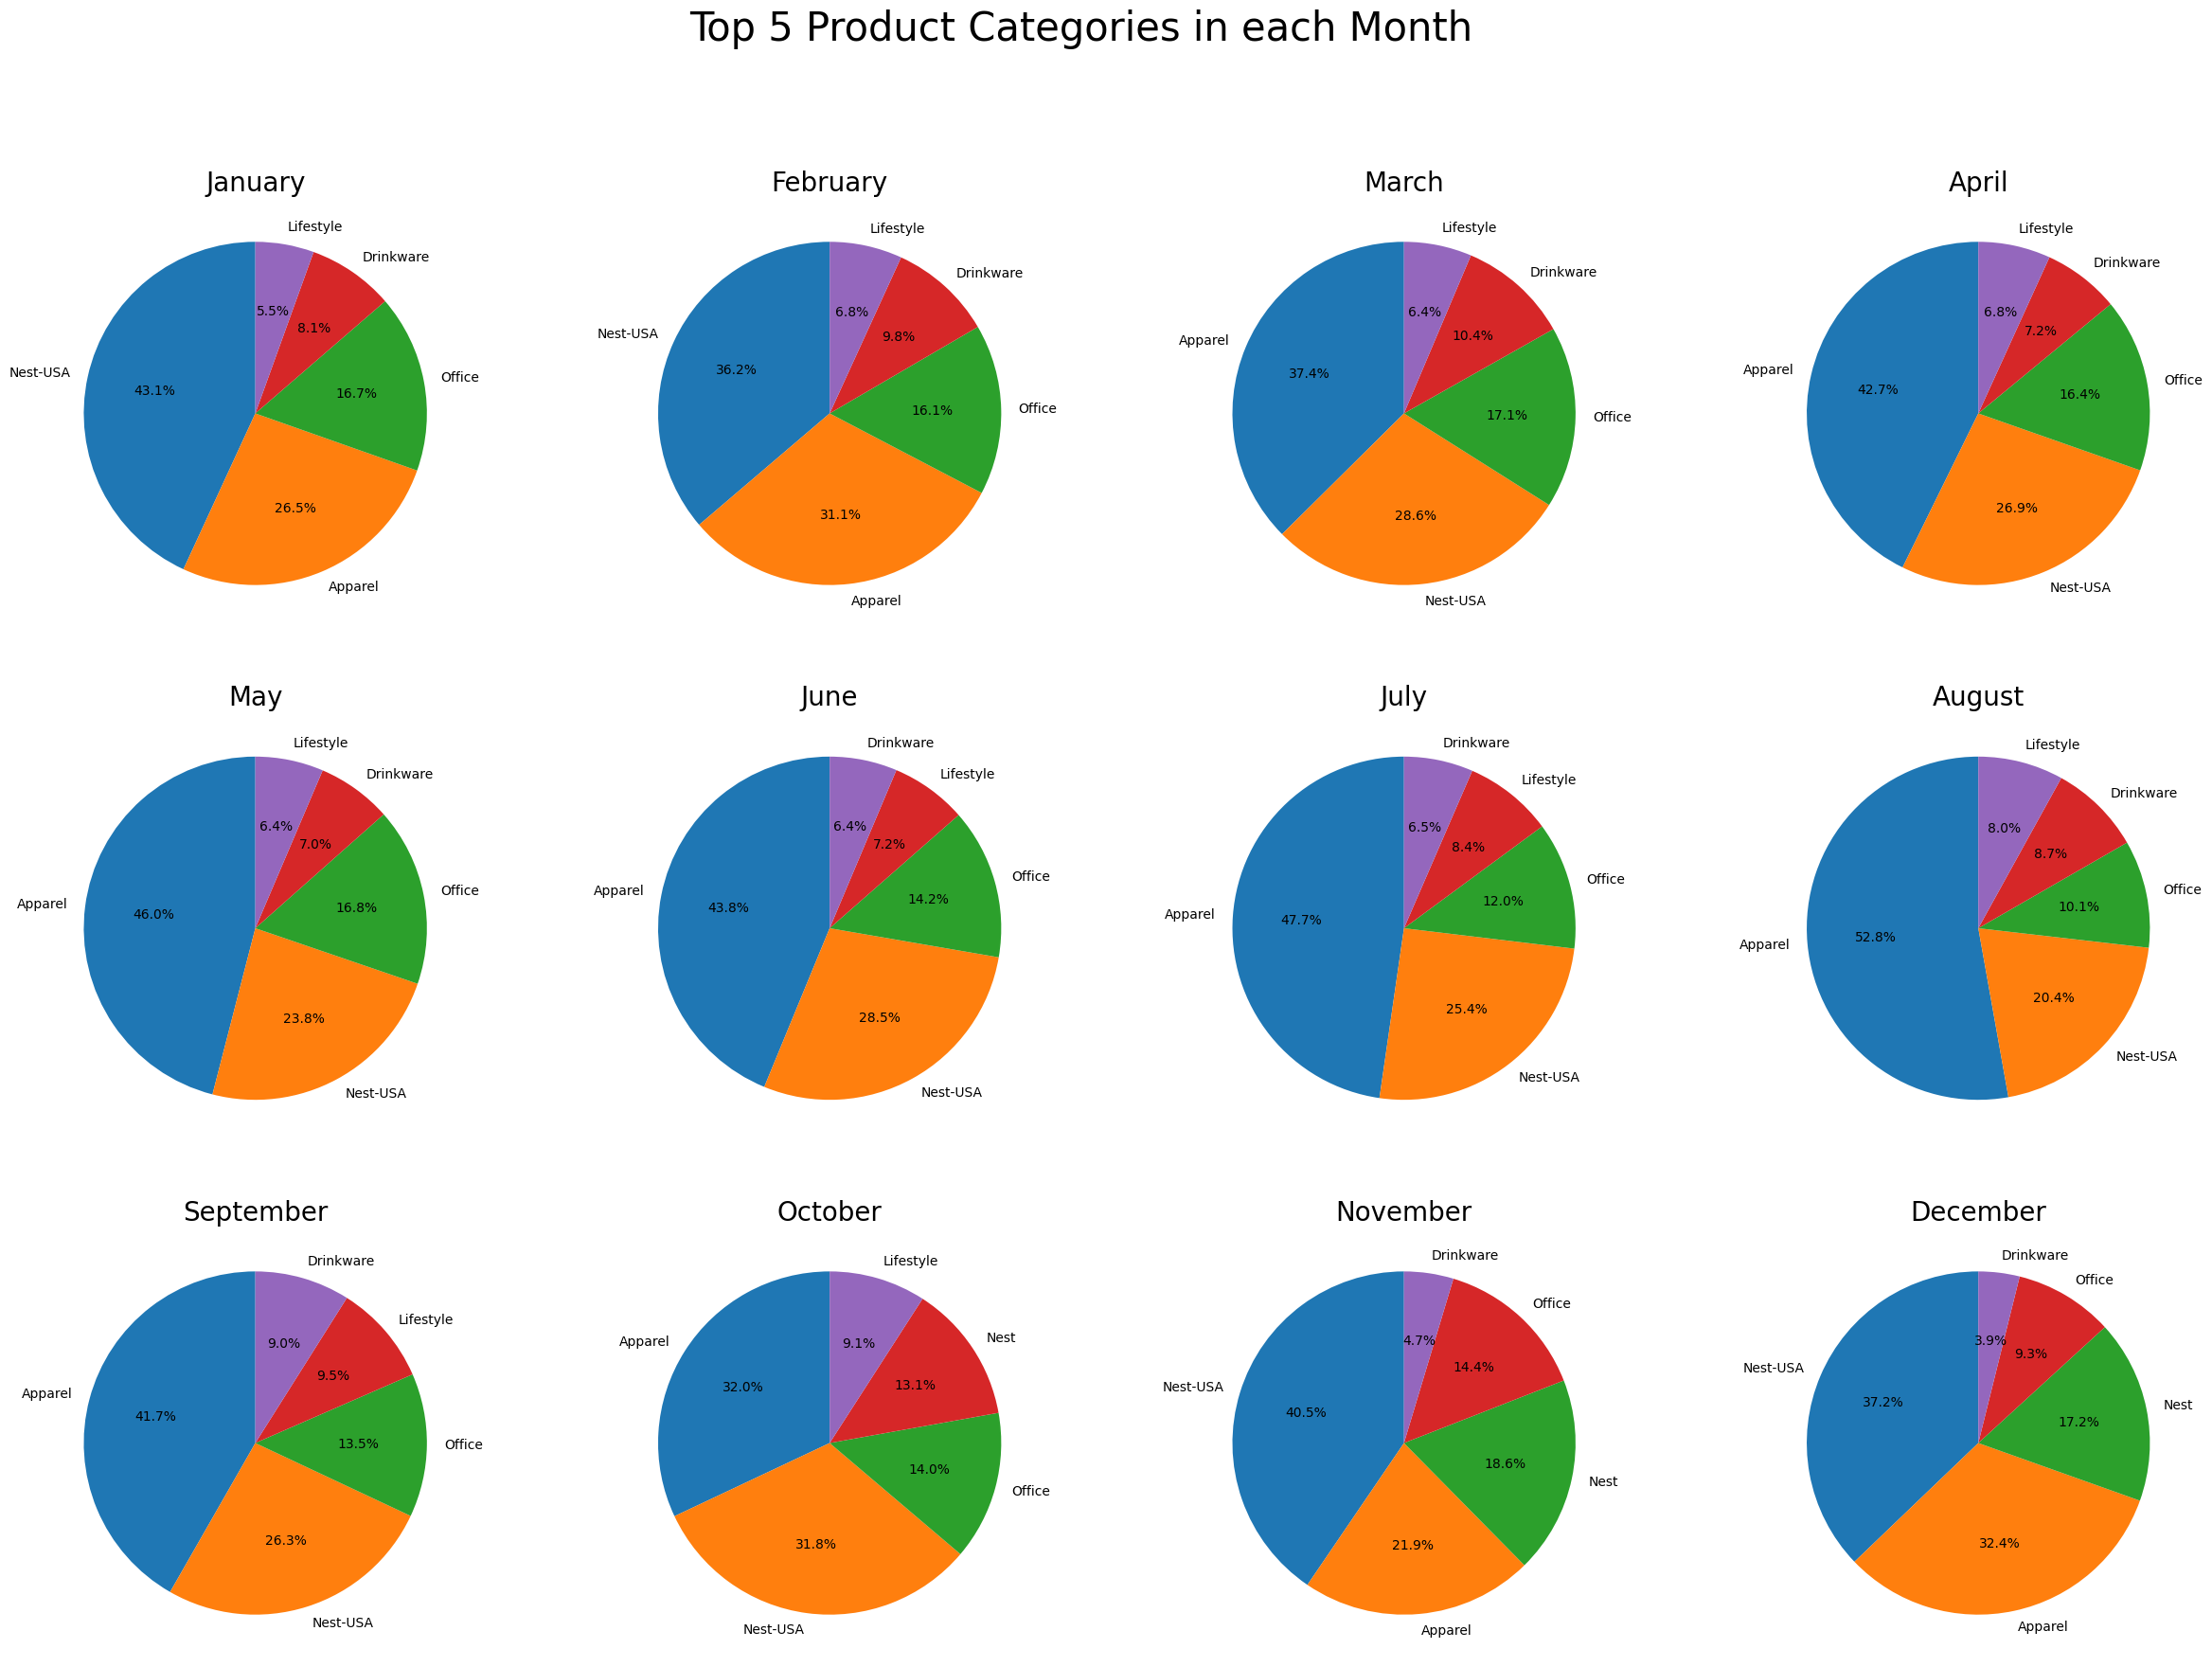

In [ ]:
plt.figure(figsize=(30,20)).suptitle('Top 5 Product Categories in each Month', fontsize=30)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in months:
  plt.subplot(3, 4, months.index(i)+1)
  plt.title(i, fontsize=20)
  data = sales_df[sales_df['Transaction_Month']==i]['Product_Category'].value_counts().head(5)
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.show()

- Apparel product category is the highest sold in Spring Months whereas Nest-USA is the highest sold in winter months.
- Nest product category has greater sales in October, November and December.
- Office, Drinkware and Lifestyle has consistent sales each month.
- Drinkware came in top 5 sales during fall months.

### Products

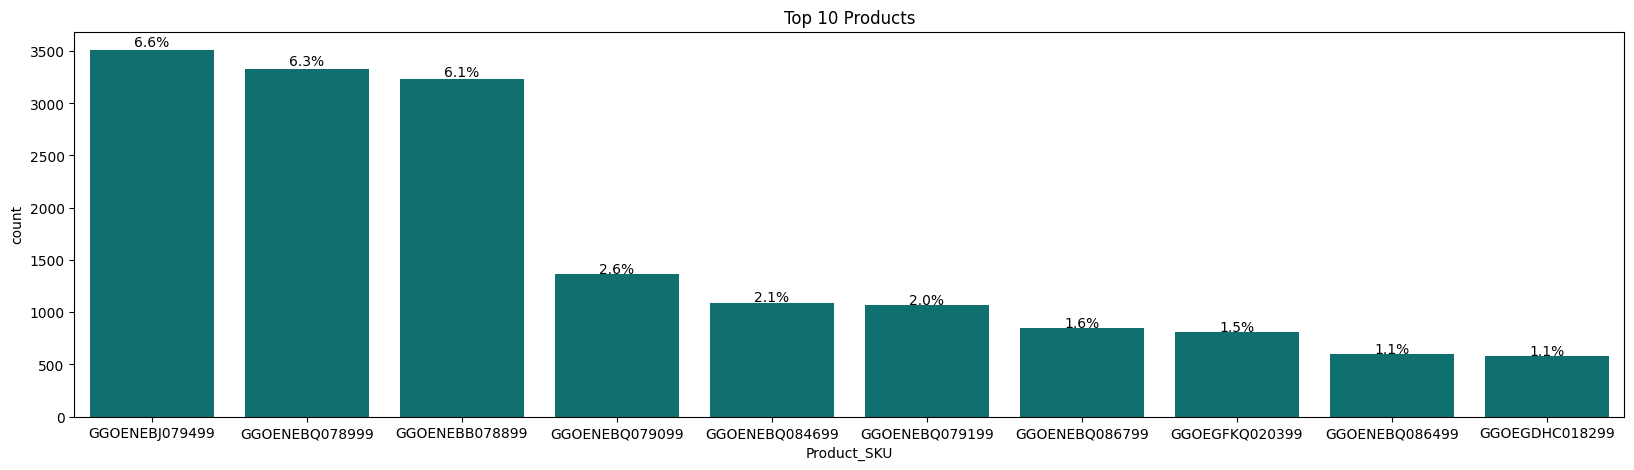

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Top 10 Products')
data = sales_df[sales_df['Product_SKU'].isin(sales_df['Product_SKU'].value_counts().head(10).index)]
g = sns.countplot(data, x='Product_SKU', order=data['Product_SKU'].value_counts().index, color = 'teal')
for p in g.patches:
  g.annotate(format((p.get_height()/len(sales_df))*100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')
plt.show()

- GGOENEBJ079499, GGOENEBQ078999, GGOENEBB078899 are the top 3 products respectively contributes to 19% of the sales altogether.
- GGOENEBQ079099, GGOENEBQ084699, GGOENEBQ079199, GGOENEBQ086799, GGOEGFKQ020399, GGOENEBQ086499, GGOEGDHC018299 are the top 4 to 10 products respectively which contributes to 12% of sales.

### Customers

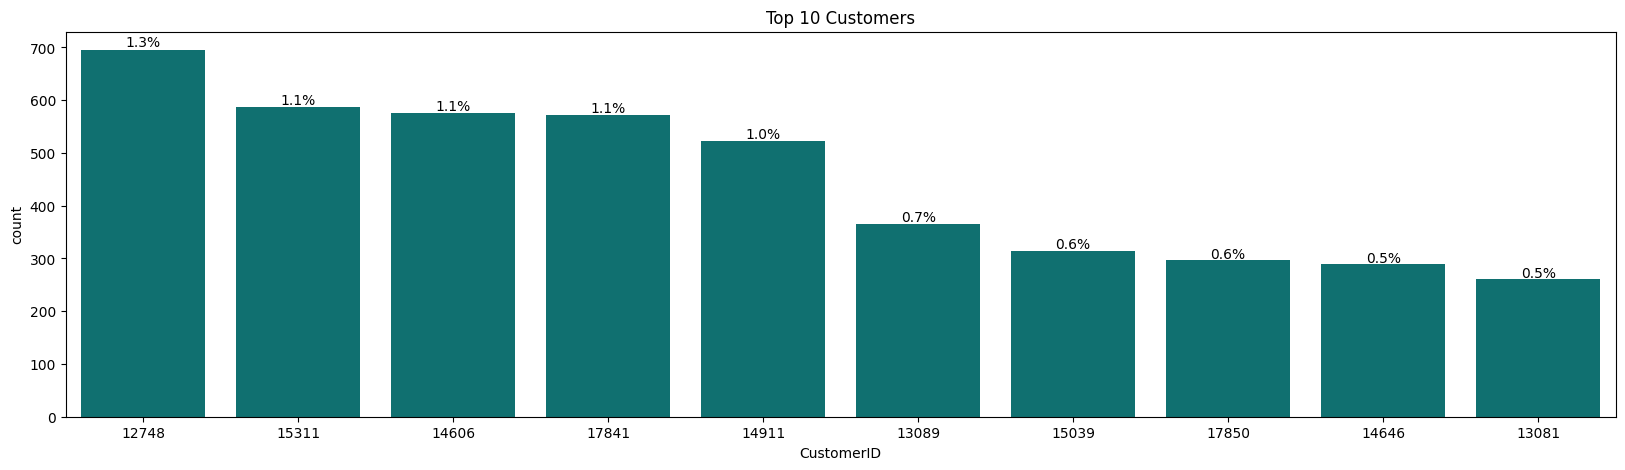

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Top 10 Customers')
data = sales_df[sales_df['CustomerID'].isin(sales_df['CustomerID'].value_counts().head(10).index)]
g = sns.countplot(data, x='CustomerID', order=data['CustomerID'].value_counts().index, color = 'teal')
for p in g.patches:
  g.annotate(format((p.get_height()/len(sales_df))*100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')
plt.show()

- Customer with CustomerID 12748 stands top in number of purchases contributing 1.3% of purchases followed by 15311, 14606, 17841.

### Invoice Value

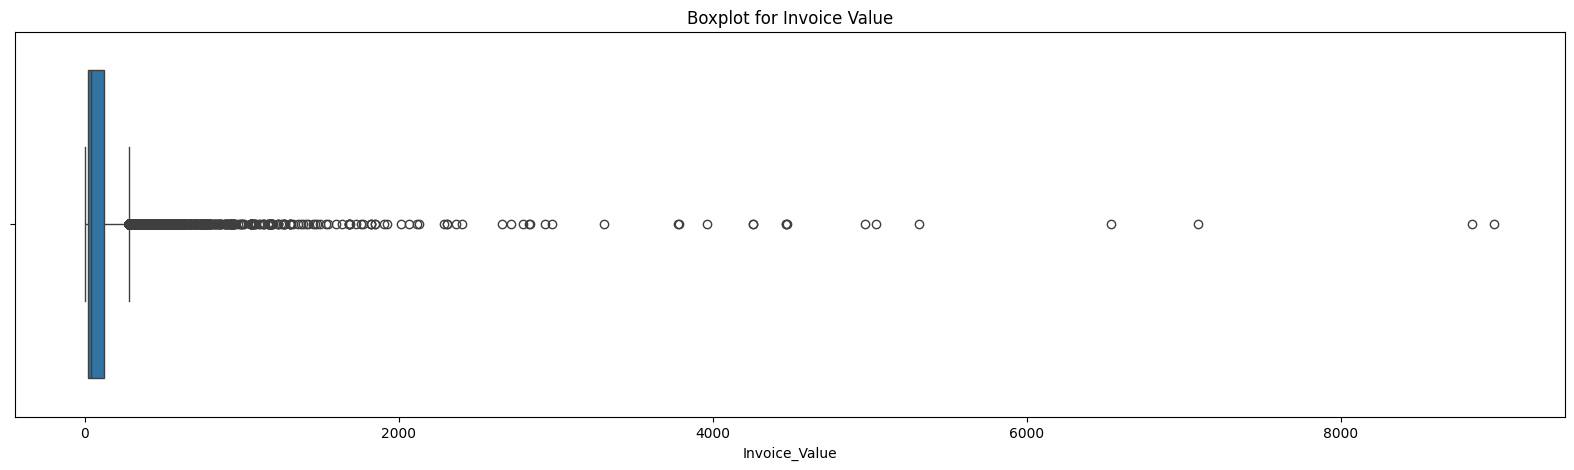

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Boxplot for Invoice Value')
sns.boxplot(data=sales_df, x='Invoice_Value')
plt.show()

- Invoice value contains so many outliers
- It is clearly not a normal distribution

### Tenure

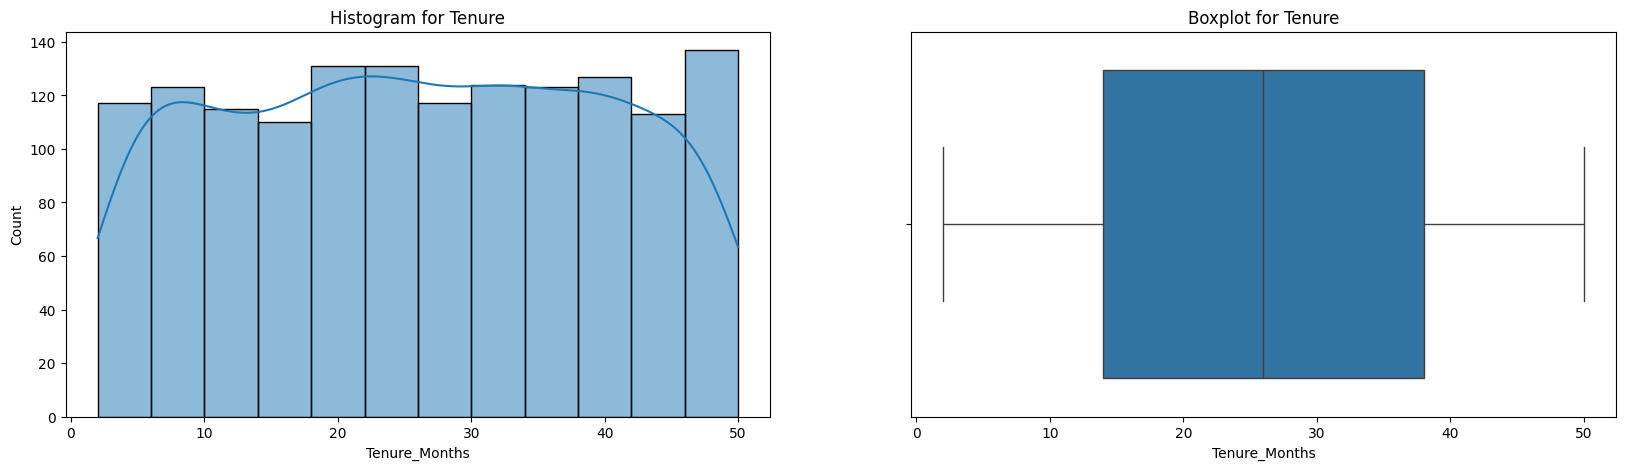

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Histogram for Tenure')
sns.histplot(cust_df['Tenure_Months'],kde=True)

plt.subplot(1, 2, 2)
plt.title('Boxplot for Tenure')
sns.boxplot(data=cust_df, x='Tenure_Months')

plt.show()

- Tenure follows normal distribution.
- Tenure ranges from 2 to 50 months with an average being 26 months.

### Time Series Analysis

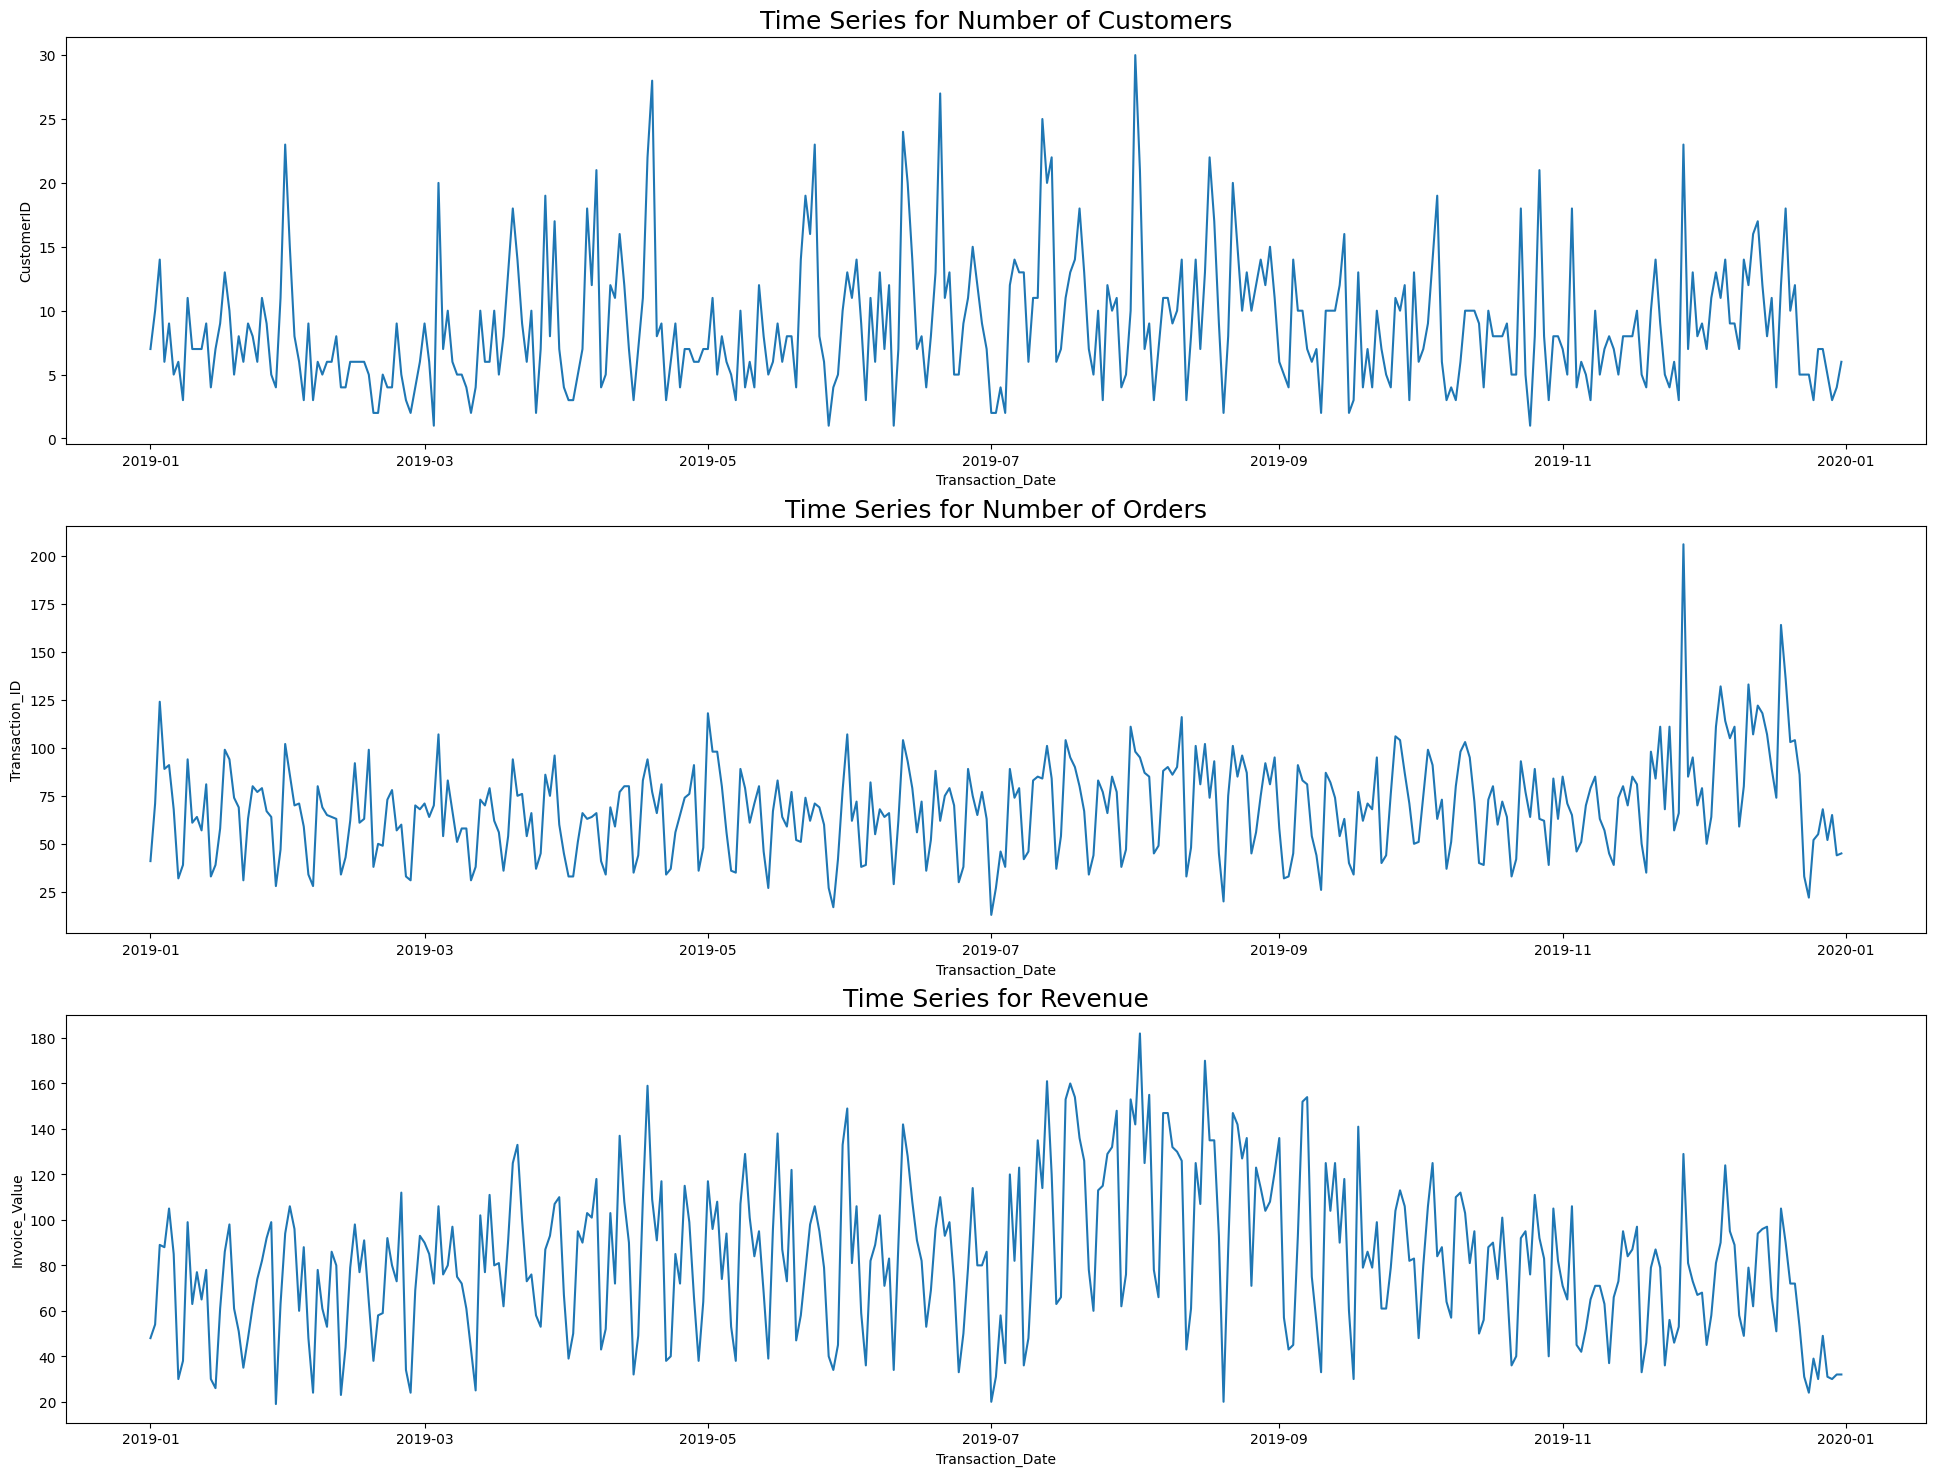

In [ ]:
plt.figure(figsize=(24, 18))

cols = ['CustomerID', 'Transaction_ID', 'Invoice_Value']
for i in cols:
  if cols.index(i) == 0:
    title = 'Number of Customers'
  elif cols.index(i) == 1:
    title = 'Number of Orders'
  else:
    title = 'Revenue'

  plt.subplot(3, 1, cols.index(i)+1)
  plt.title('Time Series for '+ title, fontsize=18)
  data = sales_df.groupby('Transaction_Date')[i].nunique().reset_index()
  sns.lineplot(x='Transaction_Date', y=i, data=data)

plt.show()

- Time series for all three (Number of Customers, Number of Orders and Revenue) appears to fluctuate throughout the year without a clear upward or downward trend.
-  There are noticeable spikes in customer numbers around late January, late April, and late July.
- There is a significant spike in the number of orders in early November, which is much higher than other days.
- There is a noticeable upward trend in revenue from the beginning of the year until mid-2019, after which the revenue appears to fluctuate more without a clear trend.

## Exploratory Data Analysis (EDA)

### Cross selling products

In [ ]:
transactions = sales_df.groupby(['CustomerID', 'Transaction_Date'])['Product_SKU'].apply(set).reset_index()
transactions['Product_Pairs'] = transactions['Product_SKU'].apply(lambda x : list(combinations(x,2)))
transactions.head()

,CustomerID,Transaction_Date,Product_SKU,Product_Pairs
0,12346,2019-09-15,"{GGOEAAAJ080816, GGOEGOAR013099}","[(GGOEAAAJ080816, GGOEGOAR013099)]"
1,12347,2019-03-24,"{GGOEGAEL031116, GGOENEBB078899, GGOEGAEL03111...","[(GGOEGAEL031116, GGOENEBB078899), (GGOEGAEL03..."
2,12347,2019-11-01,"{GGOEAKDH019899, GGOEGHPB071610, GGOEGFKQ020799}","[(GGOEAKDH019899, GGOEGHPB071610), (GGOEAKDH01..."
3,12347,2019-11-02,"{GGOEYAEJ029516, GGOENEBQ092299, GGOENEBJ07949...","[(GGOEYAEJ029516, GGOENEBQ092299), (GGOEYAEJ02..."
4,12348,2019-06-22,"{GGOEGFSR022099, GGOEGDHQ015399, GGOEGBMJ01339...","[(GGOEGFSR022099, GGOEGDHQ015399), (GGOEGFSR02..."


In [ ]:
cross_selling_products = transactions['Product_Pairs'].explode().value_counts().reset_index()
# Top 10 cross selling products
cross_selling_products.head(10)

,Product_Pairs,count
0,"(GGOENEBB078899, GGOENEBQ078999)",1088
1,"(GGOENEBJ079499, GGOENEBQ078999)",1001
2,"(GGOENEBJ079499, GGOENEBQ079099)",680
3,"(GGOENEBB078899, GGOENEBQ079099)",645
4,"(GGOENEBQ079099, GGOENEBQ078999)",626
5,"(GGOENEBB078899, GGOENEBJ079499)",571
6,"(GGOENEBQ079199, GGOENEBQ078999)",553
7,"(GGOENEBB078899, GGOENEBQ084699)",500
8,"(GGOENEBQ084699, GGOENEBQ078999)",487
9,"(GGOENEBJ079499, GGOENEBQ084699)",486


- The product pair (GGOENEBB078899, GGOENEBQ078999) has the highest cross-selling count of 1088.
- GGOENEBJ079499 and GGOENEBQ078999 frequently appear in top pairs, indicating their popularity.

### Are sales related with Discount rate ?

In [ ]:
(sales_df['Discount_pct'].value_counts(normalize=True)*100).round(1)

Discount_pct
20.0    33.7
10.0    33.0
30.0    32.5
0.0      0.8
Name: proportion, dtype: float64

- 99.2% of the products were purchased on discounts which shows that people are willing to buy products only on discounts.

In [ ]:
sales_df.groupby('Discount_pct')['Invoice_Value'].mean().reset_index()

,Discount_pct,Invoice_Value
0,0.0,92.373352
1,10.0,101.361462
2,20.0,85.762760
3,30.0,79.983016


- From this data we can see that there is no much difference in the mean sales.

- Let's test this with hypothesis testing by using kruskal wallis as there are multiple categorical columns and invoice_value does not satisfies assumptions of Anova

In [ ]:
# Kruskal Wallis test
H0 = 'Discount rate and Invoice value are dependent'
Ha = 'Discount rate and Invoice value are independent'
print('\033[1m'+'Null Hypothesis: '+'\033[0m'+H0)
print('\033[1m'+'Alternative Hypothesis: '+'\033[0m'+Ha+'\n')

alpha = 0.05
k,p = stats.kruskal(sales_df[sales_df['Discount_pct'] == 0]['Invoice_Value'], sales_df[sales_df['Discount_pct'] == 10]['Invoice_Value'], sales_df[sales_df['Discount_pct'] == 20]['Invoice_Value'], sales_df[sales_df['Discount_pct'] == 30]['Invoice_Value'])

print('\033[1m'+'Significance Level: '+'\033[0m',alpha)
print('\033[1m'+'P-Value: '+'\033[0m',p)
print('\033[1m'+'K-Statistic: '+'\033[0m',k,'\n')

if p < alpha:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+Ha)
else:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Fail to Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+H0)

Null Hypothesis: Discount rate and Invoice value are dependent
Alternative Hypothesis: Discount rate and Invoice value are independent

Significance Level:  0.05
P-Value:  2.5752890202495375e-39
K-Statistic:  182.47561924484012 

Result: Reject Null Hypothesis
Conclusion: Discount rate and Invoice value are independent


### Count of New, Retained and Churned Customers per month

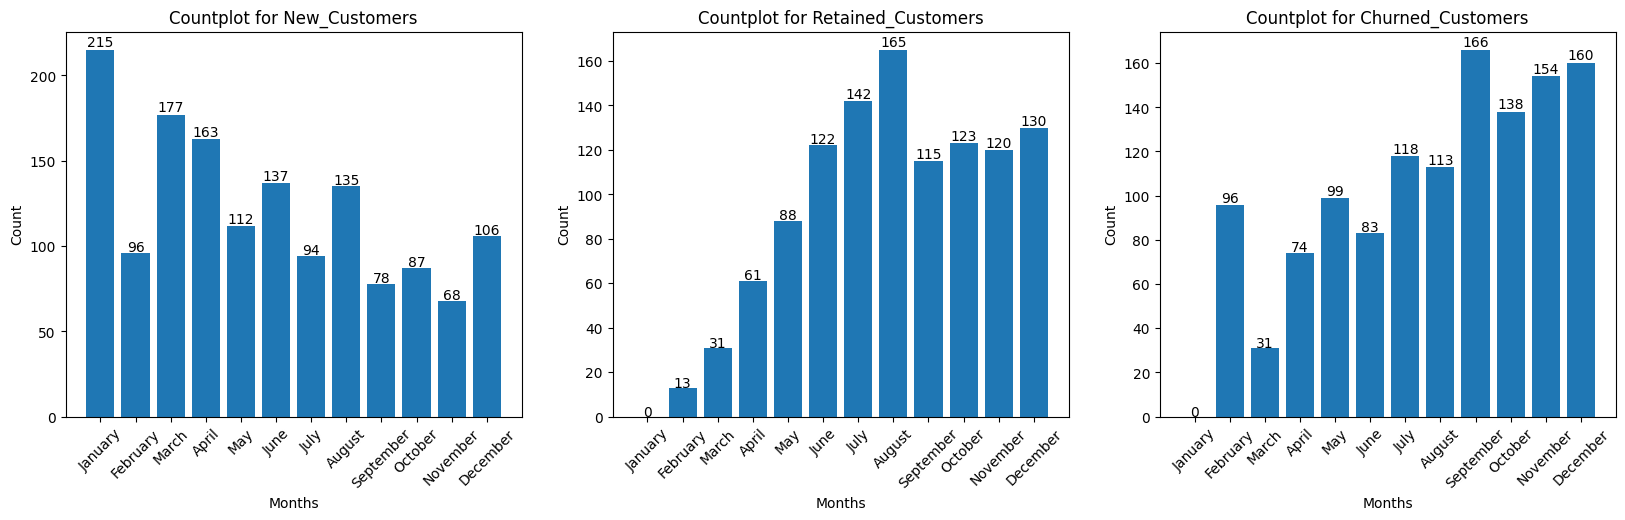

In [ ]:
month_dict = {}
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in months:
   month_dict[i] = sales_df[sales_df['Transaction_Month']==i]['CustomerID'].unique().tolist()

Retained_Customers= []
New_Customers = []
Churned_Customers = []

prev = set()
churned = set()

for i in range(12):
  curr = set(month_dict[months[i]])
  New_Customers.append(len(curr - prev))
  Retained_Customers.append(len(curr & prev))

  future_customers = set()
  for j in range(i + 1, 12):
    future_customers.update(month_dict[months[j]])

  Churned_Customers.append(len(prev - curr - future_customers - churned))

  churned.update(prev - curr - future_customers)

  prev = prev | curr

cust_stats_df = pd.DataFrame({'Month': months, 'New_Customers': New_Customers, 'Retained_Customers': Retained_Customers, 'Churned_Customers': Churned_Customers})

plt.figure(figsize=(20, 5))
cols = ['New_Customers', 'Retained_Customers', 'Churned_Customers']

for i in cols:
  plt.subplot(1, 3, cols.index(i)+1)
  plt.title('Countplot for '+i)
  plt.bar(cust_stats_df['Month'], cust_stats_df[i])
  for j in range(12):
    plt.text(x=j, y = cust_stats_df[i][j]*1.01, s=cust_stats_df[i][j], ha='center')
  plt.xlabel('Months')
  plt.ylabel('Count')
  plt.xticks(rotation=45)

plt.show()

### Churned Customers

In [ ]:
cust_df['Churned'] = np.where(cust_df['CustomerID'].isin(churned), 'Yes', 'No')
cust_df.head()

,CustomerID,Gender,Location,Tenure_Months,Churned
0,17850,Male,Chicago,12,Yes
1,13047,Male,California,43,No
2,12583,Male,Chicago,33,Yes
3,13748,Female,California,30,Yes
4,15100,Male,California,49,Yes


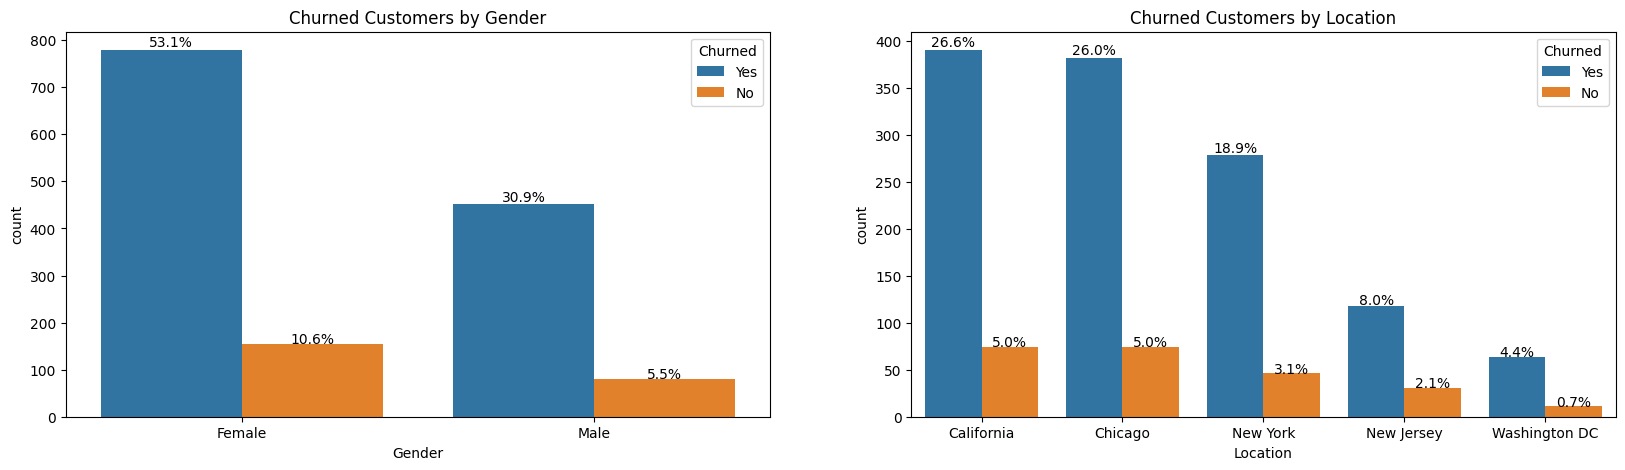

In [ ]:
plt.figure(figsize=(20, 5))
cols = ['Gender', 'Location']

for i in cols:
  plt.subplot(1, 2, cols.index(i)+1)
  plt.title('Churned Customers by '+i)
  g = sns.countplot(data=cust_df, x=i, hue='Churned', order=cust_df[i].value_counts().index)
  for p in g.patches:
    if p.get_height():
      g.annotate(format((p.get_height()/len(cust_df))*100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()*1.01), ha = 'center')

plt.show()

- 84% of the customers got churned out of which 53% are females and rest 31% are males.
- California and Chicago have almost same percentage of churned customers i.e., 26%, New York has 19%, New gercy has 8% and Washington DC has 4.5%

### Retention Rate and Churn Rate

In [ ]:
cust_stats_df['Total_Customers'] = cust_stats_df['New_Customers'] + cust_stats_df['Retained_Customers'] + cust_stats_df['Churned_Customers']
# Shift total customers by 1 to get previous month total customers
cust_stats_df['Prev_Month_Customers'] = cust_stats_df['Total_Customers'].shift(1)
cust_stats_df['Retention_Rate'] = (cust_stats_df['Retained_Customers'] / cust_stats_df['Prev_Month_Customers']).round(2)
cust_stats_df['Churn_Rate'] = (cust_stats_df['Churned_Customers'] / cust_stats_df['Prev_Month_Customers']).round(2)
cust_stats_df

,Month,New_Customers,Retained_Customers,Churned_Customers,Total_Customers,Prev_Month_Customers,Retention_Rate,Churn_Rate
0,January,215,0,0,215,NaN,NaN,NaN
1,February,96,13,96,205,215.0,0.06,0.45
2,March,177,31,31,239,205.0,0.15,0.15
3,April,163,61,74,298,239.0,0.26,0.31
4,May,112,88,99,299,298.0,0.30,0.33
5,June,137,122,83,342,299.0,0.41,0.28
6,July,94,142,118,354,342.0,0.42,0.35
7,August,135,165,113,413,354.0,0.47,0.32
8,September,78,115,166,359,413.0,0.28,0.40
9,October,87,123,138,348,359.0,0.34,0.38


- August month has highest rention rate.
- December month has highest churn rate.

In [ ]:
cust_stats_df[['Retention_Rate', 'Churn_Rate']].mean().round(2)

Retention_Rate    0.31
Churn_Rate        0.35
dtype: float64

- Average monthly retention rate is 31% whereas average monthly churn rate is 35%

### Marketing Spend vs Revenue and Orders

In [ ]:
mrkt_spend_df['Date'] = pd.to_datetime(mrkt_spend_df['Date'])
mrkt_spend_df['Month'] = pd.Categorical(mrkt_spend_df['Date'].dt.month_name(), categories=months, ordered=True)
mrkt_spend_df['Total_Spend'] = mrkt_spend_df['Online_Spend'] + mrkt_spend_df['Offline_Spend']
mrkt_spend_df['Total_Revenue'] = sales_df.groupby('Transaction_Date')['Invoice_Value'].sum().values.round(2)
mrkt_spend_df['Total_Orders'] = sales_df.groupby('Transaction_Date')['Transaction_ID'].nunique().values
mrkt_spend_df.head()

,Date,Offline_Spend,Online_Spend,Month,Total_Spend,Total_Revenue,Total_Orders
0,2019-01-01,4500,2424.50,January,6924.50,8489.73,41
1,2019-01-02,4500,3480.36,January,7980.36,14244.70,71
2,2019-01-03,4500,1576.38,January,6076.38,27379.80,124
3,2019-01-04,4500,2928.55,January,7428.55,18185.88,89
4,2019-01-05,4500,4055.30,January,8555.30,19884.09,91


#### Marketing Spend vs Total Revenue

- Lets find the relation between Total Marketing Spend and Total Revenue.
- Since both are numerical categories, we have to choose pearson or spearman correlation test.
- Lets check the distribution and decide what test to be used.

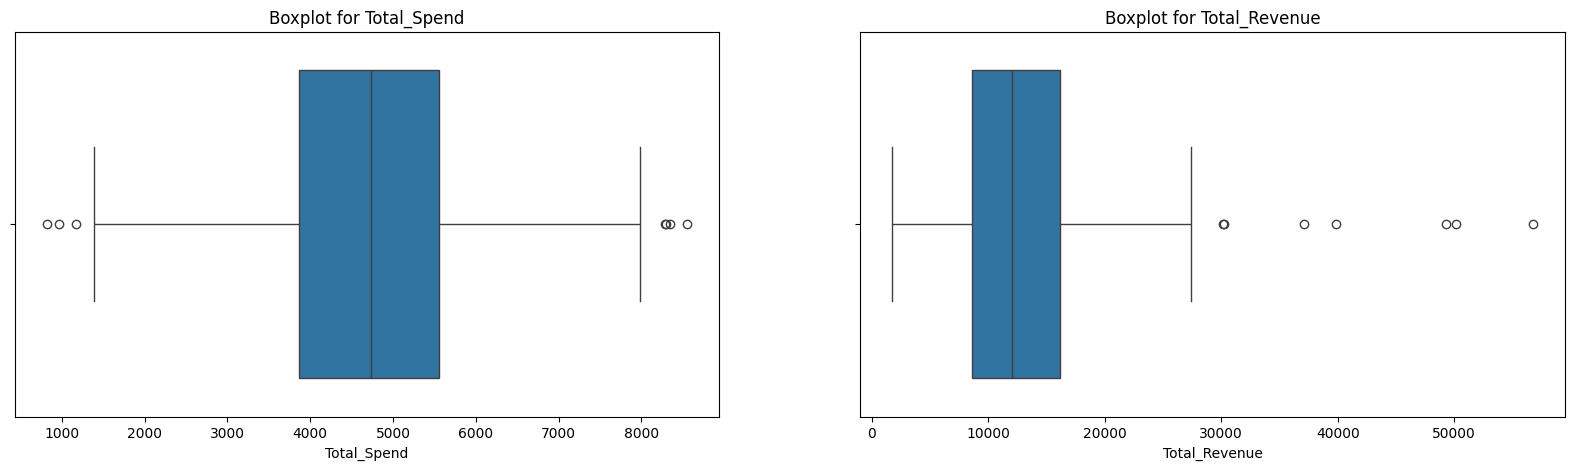

In [ ]:
plt.figure(figsize=(20, 5))
cols = ['Total_Spend', 'Total_Revenue']

for i in cols:
  plt.subplot(1, 2, cols.index(i)+1)
  plt.title('Boxplot for '+i)
  sns.boxplot(data=mrkt_spend_df, x=i)
plt.show()

- Since both the data contains outliers and also Total Revenue seems to be right skewed data, let's use spearman correlation.

In [ ]:
# Spearman Correlation test
H0 = 'There is no Correlation between Marketing Spend and Revenue generated'
Ha = 'There is a Correlation between Marketing Spend and Revenue generated'
print('\033[1m'+'Null Hypothesis: '+'\033[0m'+H0)
print('\033[1m'+'Alternative Hypothesis: '+'\033[0m'+Ha+'\n')

alpha = 0.05
s,p = stats.spearmanr(mrkt_spend_df['Total_Spend'], mrkt_spend_df['Total_Revenue'])

print('\033[1m'+'Significance Level: '+'\033[0m',alpha)
print('\033[1m'+'P-Value: '+'\033[0m',p)
print('\033[1m'+'Spearman-Coefficient: '+'\033[0m',s,'\n')

if p < alpha:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+Ha)
else:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Fail to Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+H0)

Null Hypothesis: There is no Correlation between Marketing Spend and Revenue generated
Alternative Hypothesis: There is a Correlation between Marketing Spend and Revenue generated

Significance Level:  0.05
P-Value:  0.12839228661900493
Spearman-Coefficient:  0.07973190070652457 

Result: Fail to Reject Null Hypothesis
Conclusion: There is no Correlation between Marketing Spend and Revenue generated


#### Marketing Spend vs Total no.of Orders

- Lets find the relation between Total Marketing Spend and Total number of Orders.
- Since both are numerical categories, we have to choose pearson or spearman correlation test.
- Lets check the distribution and decide what test to be used.

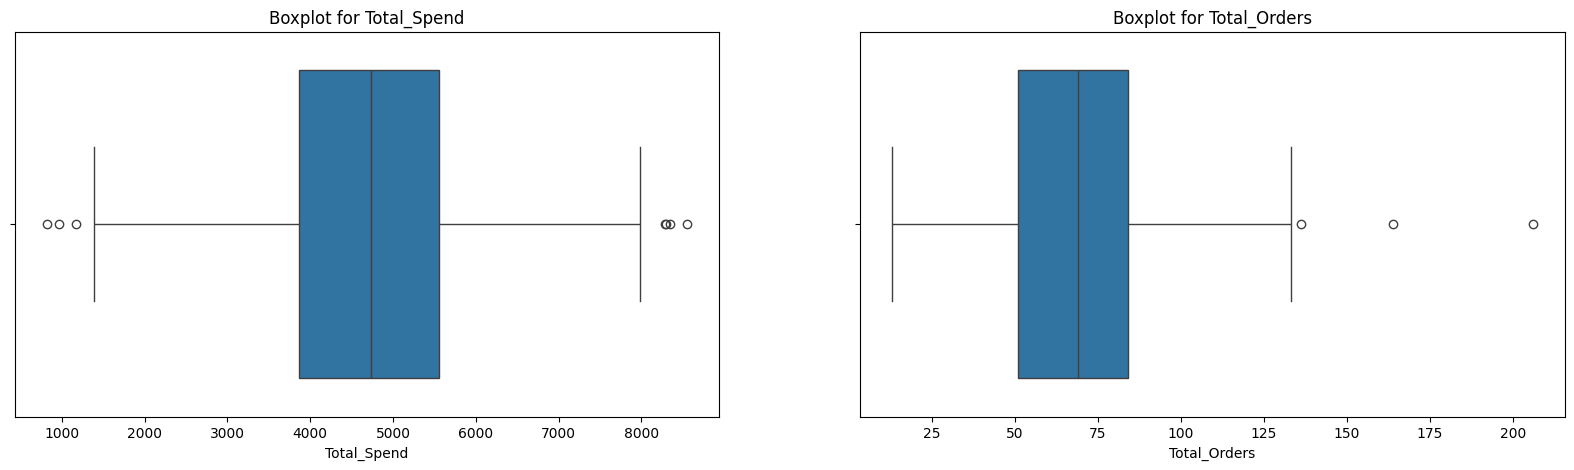

In [ ]:
plt.figure(figsize=(20, 5))
cols = ['Total_Spend', 'Total_Orders']

for i in cols:
  plt.subplot(1, 2, cols.index(i)+1)
  plt.title('Boxplot for '+i)
  sns.boxplot(data=mrkt_spend_df, x=i)
plt.show()

- Since both the data contains very less number of outliers and also data seems to be normal without those outliers, let's use pearson correlation.

In [ ]:
# Pearson Correlation test
H0 = 'There is no Correlation between Marketing Spend and Number of Orders'
Ha = 'There is a Correlation between Marketing Spend and Number of Orders'
print('\033[1m'+'Null Hypothesis: '+'\033[0m'+H0)
print('\033[1m'+'Alternative Hypothesis: '+'\033[0m'+Ha+'\n')

alpha = 0.05
s,p = stats.pearsonr(mrkt_spend_df['Total_Spend'], mrkt_spend_df['Total_Orders'])

print('\033[1m'+'Significance Level: '+'\033[0m',alpha)
print('\033[1m'+'P-Value: '+'\033[0m',p)
print('\033[1m'+'Pearson-Coefficient: '+'\033[0m',s,'\n')

if p < alpha:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+Ha)
else:
  print('\033[1m'+'Result: '+'\033[0m'+ 'Fail to Reject Null Hypothesis')
  print('\033[1m'+'Conclusion: '+'\033[0m'+H0)

Null Hypothesis: There is no Correlation between Marketing Spend and Number of Orders
Alternative Hypothesis: There is a Correlation between Marketing Spend and Number of Orders

Significance Level:  0.05
P-Value:  0.041749318074568297
Pearson-Coefficient:  0.10663139258532109 

Result: Reject Null Hypothesis
Conclusion: There is a Correlation between Marketing Spend and Number of Orders


### Monthly Cohort Analysis

In [ ]:
monthly_df = pd.DataFrame({'Month': months})
monthly_df['Total_Customers'] = cust_stats_df['Total_Customers']
monthly_df['Market_Spend'] = mrkt_spend_df.groupby('Month')['Total_Spend'].sum().values
monthly_df['Orders'] = mrkt_spend_df.groupby('Month')['Total_Orders'].sum().values
monthly_df['Revenue'] = mrkt_spend_df.groupby('Month')['Total_Revenue'].sum().values
monthly_df['Retention_Rate'] = cust_stats_df['Retention_Rate']
monthly_df['Churn_Rate'] = cust_stats_df['Churn_Rate']
monthly_df

,Month,Total_Customers,Market_Spend,Orders,Revenue,Retention_Rate,Churn_Rate
0,January,215,154928.95,2102,463883.04,NaN,NaN
1,February,205,137107.92,1664,327896.55,0.06,0.45
2,March,239,122250.09,1991,336805.20,0.15,0.15
3,April,298,157026.83,1813,447999.17,0.26,0.31
4,May,299,118259.64,2034,318556.30,0.30,0.33
5,June,342,134318.14,1940,289830.33,0.41,0.28
6,July,354,120217.85,2080,423982.35,0.42,0.35
7,August,413,142904.15,2414,418160.58,0.47,0.32
8,September,359,135514.54,1932,321128.37,0.28,0.40
9,October,348,151224.65,2125,450837.45,0.34,0.38


### Customer Lifetime Value (CLV) vs Customer Aquisation Cost (CAC)

In [ ]:
total_revenue = sales_df['Invoice_Value'].sum()
num_orders = sales_df['Transaction_ID'].nunique()
num_purchases = len(sales_df)
num_cust = sales_df['CustomerID'].nunique()

# Average Purchase Value
apv = total_revenue / num_orders
# Average Purchase Frequency Rate
apfr = num_purchases / num_cust

# Customer Value
cv = apv * apfr

#  Average Customer Lifespan
acl = sales_df.groupby('CustomerID')['Transaction_Month'].nunique().mean()

# Customer Lifetime Value (CLV)
clv = cv * acl

print('Customer Lifetime Value (CLV): ', clv.round(2))

Customer Lifetime Value (CLV):  11910.27


In [ ]:
mrkt_online_spend = mrkt_spend_df.groupby('Month')['Online_Spend'].sum().reset_index()
mrkt_offline_spend = mrkt_spend_df.groupby('Month')['Offline_Spend'].sum().reset_index()
marketing_spends = pd.merge(mrkt_online_spend, mrkt_offline_spend, how='inner', on='Month')

marketing_spends['New_Customers'] = cust_stats_df['New_Customers']
marketing_spends['CAC'] = ((marketing_spends['Online_Spend'] + marketing_spends['Offline_Spend'])/marketing_spends['New_Customers']).round(2)
marketing_spends['CLV:CAV'] = (clv/marketing_spends['CAC']).round(2)

marketing_spends

,Month,Online_Spend,Offline_Spend,New_Customers,CAC,CLV:CAV
0,January,58328.95,96600,215,720.60,16.53
1,February,55807.92,81300,96,1428.21,8.34
2,March,48750.09,73500,177,690.68,17.24
3,April,61026.83,96000,163,963.35,12.36
4,May,52759.64,65500,112,1055.89,11.28
5,June,53818.14,80500,137,980.42,12.15
6,July,52717.85,67500,94,1278.91,9.31
7,August,57404.15,85500,135,1058.55,11.25
8,September,52514.54,83000,78,1737.37,6.86
9,October,57724.65,93500,87,1738.21,6.85


In [ ]:
marketing_spends[['CAC', 'CLV:CAV']].mean().round(2)

CAC        1324.67
CLV:CAV      10.30
dtype: float64

- Customer Lifetime Value (CLV) of this E-commerce company is 11910 USD.
- Average Customer Acquisition Cost (CAC) per month is 1325 USD.
- Average ratio of CLV to CAV is 10 which means this E-commerce company is earning 10 times more than how much they spend to get a new customer.

# Insights

**Customer Demographics**

* In 2019, the company had **1468 customers**, with **females making up two-thirds (64%)** of the customer base.
* Females contributed a **greater share of sales (62%)** compared to males (38%).

**Customer Location**

* **California and Chicago** were the dominant customer locations, accounting for **around 63%** of the customer base.
* New York followed with **22%**, while New Jersey and Washington D.C. combined for the remaining **15%**.
* **Chicago led in sales (35%)**, followed by California (31%), New York (20%), Washington D.C. (9%), and New Jersey (5.5%).

**Purchase Patterns**

* **August** saw the **highest number of purchases (11%)**, followed by July (10%). February had the fewest purchases (6%).
* **Fridays and Thursdays** were the **strongest sales days**. Wednesdays, Saturdays, and Sundays also saw **above-average sales**, while Tuesdays and Mondays lagged behind.
* **Apparel** was the **top-selling category in spring**, while **Nest products** dominated **winter sales (October-December)**. Office, Drinkware, and Lifestyle categories had **consistent sales throughout the year**, with Drinkware performing well in fall.

**Top Products and Customers**

* **Three products (GGOENEBJ079499, GGOENEBQ078999, GGOENEBB078899)** were the **top sellers**, contributing **19% of total sales** combined.
* A customer with **CustomerID 12748** made the **most purchases (1.3%)**, followed by customers 15311, 14606, and 17841.
* The product pair **(GGOENEBB078899, GGOENEBQ078999)** has the highest cross-selling count of **1088**.
* **GGOENEBJ079499 and GGOENEBQ078999 frequently appear in top pairs**, indicating their popularity.


**Order Value and Discounts**

* Invoice value ranged from **USD 4 to USD 8980**, with an average of **USD 90**.
* **Nearly all products (99.2%) were bought on discount**, suggesting a discount-driven customer base.

**Customer Retention**

* **Customer churn rate was high (84%)**, with **females (53%) slightly more likely to churn than males (31%)**.
* **California and Chicago** had the **highest churn rates (26%)**, followed by New York (19%), New Jersey (8%), and Washington D.C. (4.5%).
* **August had the highest retention rate**, while December had the highest churn rate.
* The average monthly **retention rate was 31%**, compared to a **35% churn rate**.

**Marketing and Customer Lifetime Value**

* There was **no correlation between marketing spend and revenue generated**, but there was a **correlation between marketing spend and the number of orders**.
* The average **Customer Lifetime Value (CLV)** was **USD 11,910**, while the average monthly **Customer Acquisition Cost (CAC)** was **USD 1,325**. This translates to a **10:1 CLV to CAC ratio**, indicating a profitable customer acquisition strategy.

# Recommendations


**Focus on Female Customers**
- **Tailor marketing** and products to attract and retain female customers, who form 64% of your base and 62% of sales.

**Key Locations**
- **Prioritize California and Chicago** in marketing and logistics since they account for 63% of your customer base and the majority of sales.
- **Expand efforts in New York** and other areas to grow these markets.

**Seasonal and Daily Trends**
- **Promote apparel in spring** and **Nest products in winter**. Consistently market Office, Drinkware, and Lifestyle items.
- **Boost promotions on Fridays and Thursdays**, the highest sales days.

**Best Sellers and Top Customers**
- **Highlight top-selling products** and offer special deals to encourage more purchases.
- **Reward top customers** with loyalty programs and personalized offers.
- **Marketing and inventory on popular pairs**, especially those involving GGOENEBJ079499 and GGOENEBQ078999.
- **Bundle high-demand product pairs** to boost sales.

**Discounts and Order Value**
- **Evaluate discount strategy** to ensure profitability. Consider alternatives like bundle deals.
- **Encourage higher spending** with free shipping thresholds and upselling.

**Retention Strategies**
- **Address high churn rates** with personalized follow-ups and special offers, focusing on females and key regions like California and Chicago.
- **Boost retention in December** with holiday-specific campaigns and incentives.

**Marketing Efficiency**
- **Optimize marketing spend** to focus on strategies that drive orders rather than just increasing spend.
- **Leverage data** to refine customer acquisition and retention strategies.

**Customer Experience**
- **Enhance customer service** and offer easy returns to improve overall satisfaction.
- **Collect and act on feedback** to continually improve the shopping experience.